In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date,timedelta
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2019, 4, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        #expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        expirty_Date.append(max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        start_date += delta
    return expirty_Date

def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

def finddatewithvalue(future_logic_df,date_time_obj2):
    for i in range(1,6):
        #print(i)
        date_time_obj = (date_time_obj2+timedelta(days =i)).strftime('%Y-%m-%d')
        #print(future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty )
        if not future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty :
            return date_time_obj
        
def getbuyorselldf(banknifty_option_df,strike_price,date_time_obj,next_expiry):
    sell_buy_df = banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==date_time_obj)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    return sell_buy_df
              

In [3]:
def getStrikeValue():
    symbol = 'NIFTY'
    expiry_list = getExpirtyDate()
    previous_expiry_date = expiry_list[200]
    current_expiry_date = expiry_list[203]
    print(previous_expiry_date)
    print(current_expiry_date)
    #identiy next working day after previous expiry day
    start_date = previous_expiry_date+timedelta(days =1)
    print(start_date)

    nifty_fut = nsepy.get_history(symbol="NIFTY",
                            start=start_date,
                            end=start_date,
                            index=True,
                            futures=True,
                            expiry_date=current_expiry_date)
    print(nifty_fut)

In [4]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"

In [5]:
    print(os.getcwd())
    print(os.listdir())
    symbol = 'BANKNIFTY'
    banknifty = pd.DataFrame()
    formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
    month_profit_loss = pd.DataFrame()
    start_date = datetime.date(2017, 1, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(years=+1)
   
    year_month_list =[]
    p_N_L_list =[]
    cum_p_N_L_list =[]
    slipage = 5
    P_N_L_dic =  {}

    while start_date <= end_date:
            val =0
            print(str(symbol)+str(start_date.year)+".csv")
            filename = str(symbol)+str(start_date.year)+".csv"
            fname = os.path.join(database,filename)
            fname_day = os.path.join(database,filename)
            df = pd.read_csv(fname)
            df = df.loc[df['SYMBOL']== symbol]
            df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
            df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
            df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
            df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
            formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
            banknifty = banknifty.append(df)
            start_date += delta

    banknifty_option_df = banknifty[banknifty['INSTRUMENT']=='OPTIDX']
    banknifty_fut_df = banknifty[banknifty['INSTRUMENT']=='FUTIDX']
    
    

print(banknifty_fut_df)

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
BANKNIFTY2017.csv
BANKNIFTY2018.csv
BANKNIFTY2019.csv
BANKNIFTY2020.csv
BANKNIFTY2021.csv
              Date INSTRUMENT     SYMBOL   EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN  ...  SETTLE_PR  CONTRACTS  VAL_INLAKH   OPEN_INT  CHG_IN_OI  Year_month  EXPIRY_DT_Year_month
0       2017-01-02     FUTIDX  BANKNIFTY  2017-01-25        0.0         XX  18210.05  ...   18034.30    90862.0   655317.56  2269880.0   234000.0     2017-01               2017-01
1       2017-01-02     FUTIDX  BANKNIFTY  2017-02-23        0.0         XX  18306.75  ...   18102.20     1995.0    14442.96    52200.0  

In [6]:

option_expiry_date_list = banknifty_option_df.EXPIRY_DT.unique()

#future_logic_df = banknifty_fut_df [banknifty_fut_df['Date'].isin(option_expiry_date_list)]
future_logic_df = banknifty_fut_df 
future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)

option_Df = banknifty_option_df[(banknifty_option_df['Date'].isin(option_expiry_date_list)) &
                                banknifty_option_df['STRIKE_PR'].isin(future_logic_df.str_pric_iden.unique()) ]
option_Df_group = option_Df.groupby('Date')


for name, group in option_Df_group :
    #print(name)
    index = sorted(option_expiry_date_list.tolist()).index(name)
    next_expiry = sorted(option_expiry_date_list.tolist())[index+1]
    #print("next_expiry" ,option_expiry_date_list.tolist()[index+1])(date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = datetime.datetime.strptime(name,'%Y-%m-%d')
    #date_time_obj = (date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = finddatewithvalue(future_logic_df,date_time_obj)
    #print("buy date",date_time_obj)
    strike_price = future_logic_df.loc[future_logic_df['Date']== date_time_obj]['str_pric_iden'].min()
    #print("strike_price",strike_price)
    buy_df = getbuyorselldf(banknifty_option_df,strike_price,date_time_obj,next_expiry)
   
    sell_df = getbuyorselldf(banknifty_option_df,strike_price,next_expiry,next_expiry)
   
    ce_buy = buy_df.loc[buy_df['OPTION_TYP']=='CE']['OPEN'].min()
    ce_sell = sell_df.loc[sell_df['OPTION_TYP']=='CE']['CLOSE'].min()
    pe_buy = buy_df.loc[buy_df['OPTION_TYP']=='PE']['OPEN'].min()
    pe_sell = sell_df.loc[sell_df['OPTION_TYP']=='PE']['CLOSE'].min()
    
    ## Add 500+ strike for CE to sell and 500- strike for PE to sell
    
    ce_hedge_sell_df = getbuyorselldf(banknifty_option_df,strike_price+500,date_time_obj,next_expiry)
   
    ce_hedge_buy_df = getbuyorselldf(banknifty_option_df,strike_price+500,next_expiry,next_expiry)
    
    ce_hedge_sell = ce_hedge_sell_df.loc[ce_hedge_sell_df['OPTION_TYP']=='CE']['OPEN'].min()
    ce_hedge_buy = ce_hedge_buy_df.loc[ce_hedge_buy_df['OPTION_TYP']=='CE']['CLOSE'].min()
    
    pandl = (ce_sell-ce_buy)+(pe_sell-pe_buy)+(ce_hedge_sell-ce_hedge_buy)
    pandl = pandl - abs(pandl*slipage/100)
    if cum_p_N_L_list:
               # print("inlistelse ",val)
                val = cum_p_N_L_list[-1]        
    if not np.isnan(pandl):  
        p_N_L_list.append(pandl)
        cum_p_N_L_list.append(val+pandl)   
        year_month_list.append(next_expiry)
        P_N_L_dic.update({next_expiry :[date_time_obj,next_expiry,strike_price,ce_buy,pe_buy,ce_sell,pe_sell,ce_sell-ce_buy,
                                        pe_sell-pe_buy,pandl,val+pandl]})
    else:
        print("NAN number", date_time_obj,next_expiry)
    #print( ce_buy,ce_sell,pe_buy,pe_sell,"")
    #print("PNL",pandl)
    #print(p_N_L_list)
    #print(cum_p_N_L_list)
    #print(len(year_month_list))
    #print(P_N_L_dic)
month_profit_loss['Year_month'] = pd.Series(year_month_list)
month_profit_loss['P&L'] = pd.Series(p_N_L_list)
month_profit_loss['cum_P&L'] = pd.Series(cum_p_N_L_list)
week_profit_loss = pd.DataFrame(P_N_L_dic)
week_profit_loss = week_profit_loss.transpose()
week_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                           'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
print(week_profit_loss)

    


<ipython-input-6-6c1d155a196a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)


NAN number 2019-03-29 2019-04-04
NAN number 2021-04-16 2021-04-22
              Buy_date   Sell_Date Strike_price Call__buy_price Put_buy_price Call_sell_price Put_sell_price Call_PandL Put_PandL Total_PandL  Cum_PandL
2017-01-12  2017-01-06  2017-01-12        18100           157.0        125.35          767.65           0.05     610.65    -125.3    222.6325   222.6325
2017-01-19  2017-01-13  2017-01-19        18900           142.9        125.85           230.5           0.05       87.6    -125.8      -14.49   208.1425
2017-01-25  2017-01-20  2017-01-25        19000           166.5        107.05           440.7            0.1      274.2   -106.95    174.4675     382.61
2017-02-02  2017-01-27  2017-02-02        19500           201.5         196.0          575.45           0.05     373.95   -195.95     134.235    516.845
2017-02-09  2017-02-03  2017-02-09        20000           143.4         173.0          131.45           0.25     -11.95   -172.75   -149.1525   367.6925
2017-02-16  2017

In [7]:
month_profit_loss

,Year_month,P&L,cum_P&L
0,2017-01-12,222.6325,222.6325
1,2017-01-19,-14.4900,208.1425
2,2017-01-25,174.4675,382.6100
3,2017-02-02,134.2350,516.8450
4,2017-02-09,-149.1525,367.6925
5,2017-02-16,-315.6825,52.0100
6,2017-02-23,-184.2225,-132.2125
7,2017-03-02,-50.6100,-182.8225
8,2017-03-09,-6.3525,-189.1750
9,2017-03-16,23.6075,-165.5675


In [8]:
week_profit_loss[week_profit_loss['Total_PandL']>0]['Total_PandL'].sum()

27213.367499999993

In [9]:
week_profit_loss[week_profit_loss['Total_PandL']<0]

,Buy_date,Sell_Date,Strike_price,Call__buy_price,Put_buy_price,Call_sell_price,Put_sell_price,Call_PandL,Put_PandL,Total_PandL,Cum_PandL
2017-01-19,2017-01-13,2017-01-19,18900,142.9,125.85,230.5,0.05,87.6,-125.8,-14.49,208.1425
2017-02-09,2017-02-03,2017-02-09,20000,143.4,173.0,131.45,0.25,-11.95,-172.75,-149.1525,367.6925
2017-02-16,2017-02-10,2017-02-16,20200,189.6,170.3,40.7,0.5,-148.9,-169.8,-315.6825,52.01
2017-02-23,2017-02-17,2017-02-23,20700,180.5,202.15,176.75,0.3,-3.75,-201.85,-184.2225,-132.2125
2017-03-02,2017-02-27,2017-03-02,20800,129.25,130.0,0.1,192.0,-129.15,62.0,-50.61,-182.8225
2017-03-09,2017-03-03,2017-03-09,20500,130.7,119.9,218.5,0.1,87.8,-119.8,-6.3525,-189.175
2017-04-06,2017-03-31,2017-04-06,21500,138.95,150.0,119.5,0.65,-19.45,-149.35,-156.2925,7.79
2017-04-13,2017-04-07,2017-04-13,21500,148.0,98.85,178.25,0.15,30.25,-98.7,-63.6825,-55.8925
2017-04-20,2017-04-17,2017-04-20,21700,121.9,118.25,0.1,191.1,-121.8,72.85,-46.4625,-102.355
2017-05-11,2017-05-05,2017-05-11,22600,199.9,97.05,220.8,0.1,20.9,-96.95,-35.91,312.7


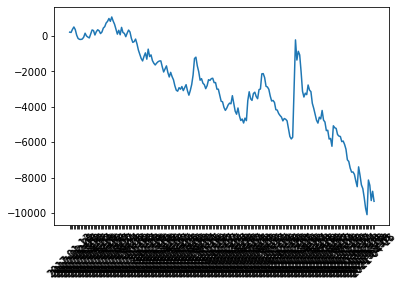

In [10]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(week_profit_loss['Sell_Date'], week_profit_loss['Cum_PandL'])
plt.show()
#plt.figure(figsize=(20,10))


In [11]:

week_profit_loss['Year'] = pd.to_datetime(week_profit_loss['Sell_Date']).dt.strftime('%Y')
grp = week_profit_loss.groupby(['Year'])

print(len(grp['Total_PandL'].sum()))   
total_period = len(grp['Total_PandL'].sum())
start_val = grp['Total_PandL'].sum()[0]
end_val= grp['Total_PandL'].sum()[total_period-1]
print(total_period,start_val,end_val)
print(cagr(start_val,end_val,total_period))

5
5 -1024.2375000000002 -1660.9950000000006
0.12847492443627462


In [12]:
result = cagr(1,3913.3675,5)
print("{:.2%}".format(result))

690.93%


In [13]:
week_profit_loss.to_csv("weekly_banknifty_option_buy_Pandl.csv")

PermissionError: [Errno 13] Permission denied: 'weekly_banknifty_option_buy_Pandl.csv'

In [ ]:
sorted(option_expiry_date_list.tolist())

In [ ]:
vix = nsepy.get_history(symbol="INDIAVIX",
            start=date(2018,1,1),
            end=date(2021,4,30),
            index=True)
plt.figure(figsize=(20,10))
vix['Close'].plot()
#print(vix.index)
#print(list(month_profit_loss['Year_month']))
vix['Date_val'] = vix.index
vix['Date_val'] =vix[['Date_val']].astype(str)
print(len(list(month_profit_loss['Year_month'])))
#print((vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]))
val= list(vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]['Close'])
month_profit_loss['vix']= val
print(month_profit_loss)

In [ ]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['cum_P&L'])
plt.show()
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['vix'])
plt.show()